In [2]:
import .file_path as fp
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import math
import collections
import os
from tensorflow.contrib.tensorboard.plugins import projector

In [3]:
input_data = pd.read_csv(fp.csv_folder+"beauty_data_info_train_competition.csv")
# convert floating points class types to integer. Empty class type is filled with -1
input_data[input_data.columns.values[3:]] = input_data[input_data.columns.values[3:]].fillna(-1.0).astype(int)

In [3]:
for col in input_data.columns.values:
    print(col, ": unique values =", len(input_data[col].unique()), ", non-empty rows =", len(input_data.dropna(subset=[col])))

itemid : unique values = 286583 , non-empty rows = 286583
title : unique values = 206379 , non-empty rows = 286583
image_path : unique values = 286583 , non-empty rows = 286583
Benefits : unique values = 8 , non-empty rows = 286583
Brand : unique values = 300 , non-empty rows = 286583
Colour_group : unique values = 40 , non-empty rows = 286583
Product_texture : unique values = 10 , non-empty rows = 286583
Skin_type : unique values = 9 , non-empty rows = 286583


Looks like there are duplicated item titles

In [4]:
freq_dict = dict()
for title in input_data.title.values:
  if title in freq_dict:
    freq_dict[title] += 1
  else:
    freq_dict[title] = 1
for k, v in freq_dict.items():
  if v > 1:
    print(k)

milani rose powder blush
etude house baby sweet sugar powder
dr pure whitening cream
monistat chafing relief gel
milani rose powder blush tea
the balm meet matte trimony
elf acne fighting foundation beige
cream dr biru original
city color cream concealer contour palette
make over cleansing cream
missha perfect cover bb cream 20ml
cream cr biru original
hadalabo gokujyun alpha ultimate anti aging lotion 100ml
hera cc cream natural beige
bb cream etude house
wardah renew you anti aging
wardah luminous liquid foundation
the balm in of your hand palette
preloved maybelline white super fresh
kat von d shade light eye contour palette
the balm mary lou manizer
the balm mary lou
theraskin compact powder kl
the balm sexy mama
wardah c defense dd cream spf30
revlon photoready insta fix highlighthing shimering stick
wardah hydrating aloe vera gel
bedak maybelline clear smooth original pressed powder
the face shop oil control water cushion preloved
jordana powder bronze
big cover stick concealer e

chanel cc cream spf50
terbaru pixy make it glow dewy cushion spf 23 pa
theraskin ss cream
facial wash acne theraskin
bioaqua super wearing bb cream 30ml
preloved l oreal infallible pro matte shade 105 natural beige
terbaru wardah lightening bb cake powder
terlaris nyx wonder stick
best seller catrice hd liquid coverage fond 30ml
maybelline face studio strobing cream
wardah white secret pure brightening cleanser
terlaris nyx wonder pencil
terbaru inez satin smooth liquid foundation
bioaqua air cushion extreme bare aqua
terbaru etude house cc cream
kitoderm sunscreen foundation acne sunscreen+alas bedak jerawat
pixy loose powder 4 beauty benefits
share in bottle 30 ml cosrx bha blackhead power liquid
best seller maybelline fit me matte poreless powder
paling murah shu uemura poreraser cc mousse 30 g pink
paling murah innisfree no sebum mineral powder 5gr
paling murah laneige refill bb cushion pore control no 23 sand
maybelline super bb cream cover spf 50
bioaqua chic trendy rose blush on

voyage the balm vol.ii palette eyeshadow lip&cheek bronzer
magic plus white cream premium
love 3ce baby glow cushion
maybelline bb cushion fresh matte 03 natural
temulawak v natural siang malam
preloved maybelline super bb cushion
murah wardah white secret exfoliating lotion
laneige new bb cushion whitening
makeover liquid matt foundation
flormar bedak loose powder 11 gr
maybelline two cake powder susun 5 color
emina bare with me loose powder bedak tabur
sold out laneige bb cushion
ms glow paket acne
loreal paris infallible pro glow spf 15 30ml
the balm girls getaway trio long wearing bronzer blush
maybelline color show blush wooden rose
the face shop oil clear blotting powder
terlaris innisfree no sebum blur powder 5gr
new cc cream fair n pink original complete care perawatan wajah
theraskin bedak padat kl kn harga murah grosir
immortal loose baked powder crystal natural
fairnpink complete care cc cream fair n pink bpom
sarange natural finisher pact bedak padat
nyx hd studio photogeni

milani blush tea rose
maybelline dream wonder powder matte
skinnova bb cream acne
the face shop cc intense cover cushion
sk ii color clear beauty powder foundation spf25 pa refill
theraderm bb white spf50 whitening sunblock cream 40g made in korea
foundation giordani gold long wear mineral spf 15
wardah luminious liquid foundation
bedak lancome 2in1
focallure loose powder setting
cream dior beauty
innisfree cushion case 137
the balm trio manizer sister
best quality pelembab olay total effects 7in1touch of foundation bb cream spf15 50g terjamin
dior nude air compact powder
diskon pixy bb cream bright fix
make over silky smooth translucent powder 03
paling laris innisfree no sebum mineral powder
preloved bedak tabur ultima ii
tidak pakai brush liquid foundation 88 spf 30 pa original
innisfree green tea mineral mist 50ml
purbasari flawless matte bb two way cake bedak compact
zalfa miracle natural vit c spray
pigeon teens squalane compact powder refill
aloe vera shooting gel nature republi

loreal lumi cushion unik berkualitas
wardah lightening bb cream natural
termurah voyage the balm vol.ii palette eyeshadow lip&cheek bronzer
nyx 78 warna pallet eye shadow
terlaris pixy bedak twc uv whitening perfect fit
cream malam yu chun mei cordyseps b
dr.gold day cream 20gr dr.pure gold dr pure
acne care lab face powder
silkygirl bedak bb brightening 2 way foundation
termurah cream rd original 30 gram holo 2 bunga tali hijau 100
super baru murah kualitas new maybeline bb cushion 03 natural
maybelline fit me set smooth powder classic ivory
innisfree no sebum mineral powder x snoopy limited edition 5g
acne bio cream
wardah everyday lominous face powder
laneige clear c peeling serum 80 ml
bioaqua bb cushion plus refill
forever nude kiss beauty color pallete
cream farmacy
termurah wardah dd cream spf 30 20 gr
3ce cream blusher new pink
nyx powder puff lippie
powder eyeshadow trio wet dry formula
urban decay naked skin shapeshifter palette in light medium
kiss beauty matte liquid founda

wardah everyday luminous face powder unik berkualitas
wardah refill lightening twc light feel
nature republic blackhead clear nose pack
magic plus white cream 35g 2 pcs 10 sachet terjamin kualitasnya
cream hn original 100 ori
promo bedak tabur ponds bb magic powder thailand
best price purbasari bedak flawless matte bb two way cake compact
kiss beauty countour stick 2in1
blink tm krem cream temulawak ori holo gold logo emboss dus hologram
fairnpink complete care cc cream fair n pink original murah
dr.jart cicapair re cover spf 30 pa
ertos cc cream whitening intensive treatment erto
bpom bb glow crystal cosmetics
withcase laneige bb cushion whitening new case 2016
new sk ii sk2 skii cc auractivator spf 50
ertos cc cream whitening intensive treatment original
shineskin bb cream light
natural ms glow perfect loose powder bedak tabur
3ce baby glow cushion
wardah bedak wajah compact lightening two way cake light feel original
skindinavia makeup finishing spray oil control
best seller ready s

cuci gudang original loreal paris true match lumi cushion
milani rose powder
estee lauder double wear stay in place makeup spf 10 pa 1 ml
etude house lovely cookie blusher 11 peach choux wafers
kitoderm bb cream beige 01
new arrival innisfree no sebum mineral powder
refill pixy two way cake original bpom isi ulang bedak
the face shop flash pink powder beam
ertos night cream original
loreal infallible pro matte foundation 107 fresh beige
sale cc cream fair n pink original complete care
eye cream with gluconolactone theraskin 10gr
sulwhasoo perfecting cushion size 5gr travel
terbaru secret key starting treatment cream
cream natural 99 king lusinan
new laneige bb cushion pore control spf 50 pa
theraskin aha 10 cream terjamin kualitasnya
acne cream jerawat parah ms glow
focallure long lasting liquid concealer
the ordinary 100 organic cold pressed rose hip seed oil 30ml
ready parasol es spf 45 heliatech suncreen
bioaqua exquisite and delicate bb cushion
la tulipe powdery make up
promo cc cr

terbaru dd cream fair n pink bpom original 25gr produk
wardah instaperfect mineralight matte bb cushion 12 ivory 15 g
ertos baked powder all in 1 bedak murah
senka perfect whip washing cream by shiseido
etude house precious mineral moist any cushion
bedak tabur loose powder theraskin
skinfood sugar cheek stick
mineral botanica acne care loose foundation 15 g
make over silky smooth translucent powder 01 porcelain
kiss beauty 5in1 powder
mineral botanica original loose foundation natural
the balm dessert bronzer
maybelline fitme matte poreless powder
cream walet gold anti aging
emina beauty bliss cream natural
morphe bubuk seal the eyebrow powder stamp cetakan alis
facial foam cleanser temulawak v natural original bpom resmi
reffil revlon bedak natural finish powdery foundation
etude house precious mineral beautifying block cream moist sample
fanbo compact powder red
discount etude house play 101 stick contour duo
theraskin loose powder hi grade
hanasui serum anti acne by jaya mandiri or

bedak revlon twc 2in1 padat+basah
pensil alis revlon hitam
bioaqua black mask remove blackhead
ertos bake powder original
bb cream wardah original
preloved the face shop oil control water cushion
lt pro powder blush on refill
etude house precious mineral any cushion spf50 pa
centac cream theraskin bopeng
face shop miracle finish oil control cushion
city color contour cream palette
laneige bb cushion pore control spf 50 pa new version
cosrx low ph good morning gel cleanser 150ml
peripera peri s cushion lips
fresh 3ce barbapapa fitting cushion foundation make up wajah
maybelline fit me light
bioaqua rejuvenation cream acne jerawat
promo esenses skin perfecting cushion
flash sale freeman clay mask avocado lemon pink salt deadsea mineral
sulwhasoo perfecting cushion brightening set limited edition 2017 1 refill spf50 pa
ecer ertos soyben powder drink whitening
preloved catrice sun glow matt bronzing powder
pixy compact powder pure finish beige
jafra cc cream complexion corrector spf 15 uni

diskon wardah exclusive matte lip cream
focallure matte lip cream
oods.id lipstick matte anti air tahan lama
peripera peri s tint ink liptint korea original tahan lama
lipstick lip gloss bentuk kotak anti air tahan lama
produk terlaris dior addict lip tattoo 661 natural red
wet n wild megalast lip color smokin hot pink
wet n wild think pink
kylie cosmetics matte liquid lipstick
tony moly peach hand cream
ready 1 12 pixy lip cream matte
the balm lipstick
etude house balm color tint new
nyx mega shine lip gloss beige lg129
jordana sweet cream matte mango sorbet baru berkualitas
the balm meet matt e hugnes commited tanpa box
maybelline color sensational powder mattes toasted brown
pixy lip cream 05 edgy plum
lipstick lip gloss model matte sexy tahan lama
crystal heart cosmetics liquid matte lipstick samantha
novo lipstick pelembab tahan lama untuk wanita
wardah everyday fruit sheer lip balm
miss rose makeup matte lipstick long lasting waterproof velvet rotate pencil
lipstick lip gloss cai

In [4]:
def is_phone_number(string):
  if len(string) <= 3:
    return False
  digit_count = 0
  for char in string:
    if char.isdigit():
      digit_count += 1
      
  if digit_count > 3:
    return True
  
  return False

In [5]:
vocabulary  = list()

for line in input_data.title.values:
  tokens = line.split()
  for token in tokens:
    # remove telephone numbers
    if len(token) == 1 and not token.isdigit():
      continue
    if is_phone_number(token):
      continue
      
    vocabulary.append(token)
    
print('Data size', len(vocabulary))

Data size 2129823


In [6]:
import collections

vocabulary_size = 500

def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary, vocabulary_size)
# del vocabulary  # Hint to reduce memory.
print('Most common words', count[1:6])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])
print("length of the dictionary: ", len(reverse_dictionary), "should be equal to", vocabulary_size)

Most common words [('cream', 74436), ('powder', 62796), ('bb', 35959), ('cushion', 31834), ('bedak', 25287)]
Sample data [43, 0, 0, 0, 13, 118, 14, 21, 121, 32] ['nyx', 'UNK', 'UNK', 'UNK', 'natural', 'palette', 'etude', 'house', 'precious', 'mineral']
length of the dictionary:  500 should be equal to 500


In [7]:
# calculate Term Frequency - Inverse Term Frequency for most common words
known_word_set = set([word for word, _ in count[1:]])

In [8]:
term_freq = dict()
inverse_term_freq = dict()
term_document_count = dict()
for itemid, title in input_data[["itemid", "title"]].values:
  tokens = title.split()
  unique_tokens = set()
  for token in tokens:
    if token not in known_word_set:
      continue
    if (itemid, token) in term_freq:
      term_freq[(itemid, token)] += 1
    else:
      term_freq[(itemid, token)] = 1
    unique_tokens.add(token)
    
  for token in unique_tokens:
    if token in term_document_count:
      term_document_count[token] += 1
    else:
      term_document_count[token] = 1  

n_documents = len(input_data)
for token, count in term_document_count.items():
  inverse_term_freq[token] = math.log(n_documents / count)

In [9]:
# no word is repeated in each title
for k, v in term_freq.items():
  if v > 1:
    print(k)

In [10]:
data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)  # pylint: disable=redefined-builtin
  if data_index + span > len(data):
      data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0], reverse_dictionary[labels[i, 0]])

0 UNK -> 0 UNK
0 UNK -> 43 nyx
0 UNK -> 0 UNK
0 UNK -> 0 UNK
0 UNK -> 13 natural
0 UNK -> 0 UNK
13 natural -> 118 palette
13 natural -> 0 UNK


In [11]:
# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 64  # Dimension of the embedding vector.
skip_window = 1  # How many words to consider left and right.
num_skips = 2  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

graph = tf.Graph()

with graph.as_default():

  # Input data.
  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Look up embeddings for inputs.
  with tf.name_scope('embeddings'):
    embeddings = tf.Variable(
        tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# Construct the variables for the NCE loss
  with tf.name_scope('weights'):
    nce_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size], stddev=1.0 / math.sqrt(embedding_size))
    )
  with tf.name_scope('biases'):
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))

  # Add the loss value as a scalar to summary.
  tf.summary.scalar('loss', loss)

  # Construct the SGD optimizer using a learning rate of 1.0.
  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Merge all summaries.
  merged = tf.summary.merge_all()

  # Add variable initializer.
  init = tf.global_variables_initializer()

  # Create a saver.
  saver = tf.train.Saver()

In [12]:
log_dir = "D:/NDSC_2019/tf_logs/"

In [13]:
# Step 5: Begin training.
num_steps = 40001

with tf.Session(graph=graph) as session:
#   Open a writer to write summaries.
  writer = tf.summary.FileWriter(log_dir, session.graph)

  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in range(num_steps):
    batch_inputs, batch_labels = generate_batch(batch_size, num_skips,
                                                skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # Define metadata variable.
    run_metadata = tf.RunMetadata()

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    # Also, evaluate the merged op to get all summaries from the returned "summary" variable.
    # Feed metadata variable to session for visualizing the graph in TensorBoard.
    _, summary, loss_val = session.run(
        [optimizer, merged, loss],
        feed_dict=feed_dict,
        run_metadata=run_metadata)
    average_loss += loss_val

    # Add returned summaries to writer in each step.
    writer.add_summary(summary, step)
    # Add metadata to visualize the graph for the last run.
    if step == (num_steps - 1):
      writer.add_run_metadata(run_metadata, 'step%d' % step)

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
#     if step % 10000 == 0:
  
  sim = similarity.eval()
  for i in range(valid_size):
    valid_word = reverse_dictionary[valid_examples[i]]
    top_k = 8  # number of nearest neighbors
    nearest = (-sim[i, :]).argsort()[1:top_k + 1]
    log_str = 'Nearest to %s: %s' % (valid_word, ", ".join([reverse_dictionary[k] for k in nearest]))
    print(log_str)
  final_embeddings = normalized_embeddings.eval()

  # Write corresponding labels for the embeddings.
#   with open(log_dir + '/metadata.tsv', 'w') as f:
#     for i in range(vocabulary_size):
#       f.write(reverse_dictionary[i] + '\n')

  # Save the model for checkpoints.
#   saver.save(session, os.path.join(log_dir, 'model.ckpt'))

  # Create a configuration for visualizing embeddings with the labels in TensorBoard.
#   config = projector.ProjectorConfig()
#   embedding_conf = config.embeddings.add()
#   embedding_conf.tensor_name = embeddings.name
#   embedding_conf.metadata_path = os.path.join(log_dir, 'metadata.tsv')
#   projector.visualize_embeddings(writer, config)

writer.close()

Initialized
Average loss at step  0 :  121.57011413574219
Nearest to etude: cuci, anastasia, 50, besar, terbaru, flash, lou, beverly
Nearest to laneige: ertos, with, 35, oil, powder, sheer, 04, sk
Nearest to termurah: murah, ml, warna, nars, 50ml, lipstik, powder, palette
Nearest to mineral: kulit, price, ongkir, me, flek, pro, 20, but
Nearest to 15: price, lip, muscle, maybeline, facial, krim, pink, and
Nearest to sebum: stay, series, hd, highlighter, eyebrow, apieu, you, bulan
Nearest to over: biru, concealer, miracle, rose, translucent, refill, gudang, tabur
Nearest to up: product, malam, on, it, all, sheer, ee, lips
Nearest to concealer: melembabkan, true, over, lt, rose, 3, manizer, inez
Nearest to on: multi, radiance, pro, stick, oriflame, up, water, product
Nearest to liquid: way, powder, precious, kulit, chanel, sk, marcks, palette
Nearest to preloved: 12, delicate, kakak, chanel, true, dr, lips, inez
Nearest to makeup: with, for, limited, eyeshadow, baru, jerawat, gel, to
Near

In [14]:
# Step 6: Visualize the embeddings.
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
plot_only = min(500, vocabulary_size)
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [reverse_dictionary[i] for i in range(plot_only)]

[]

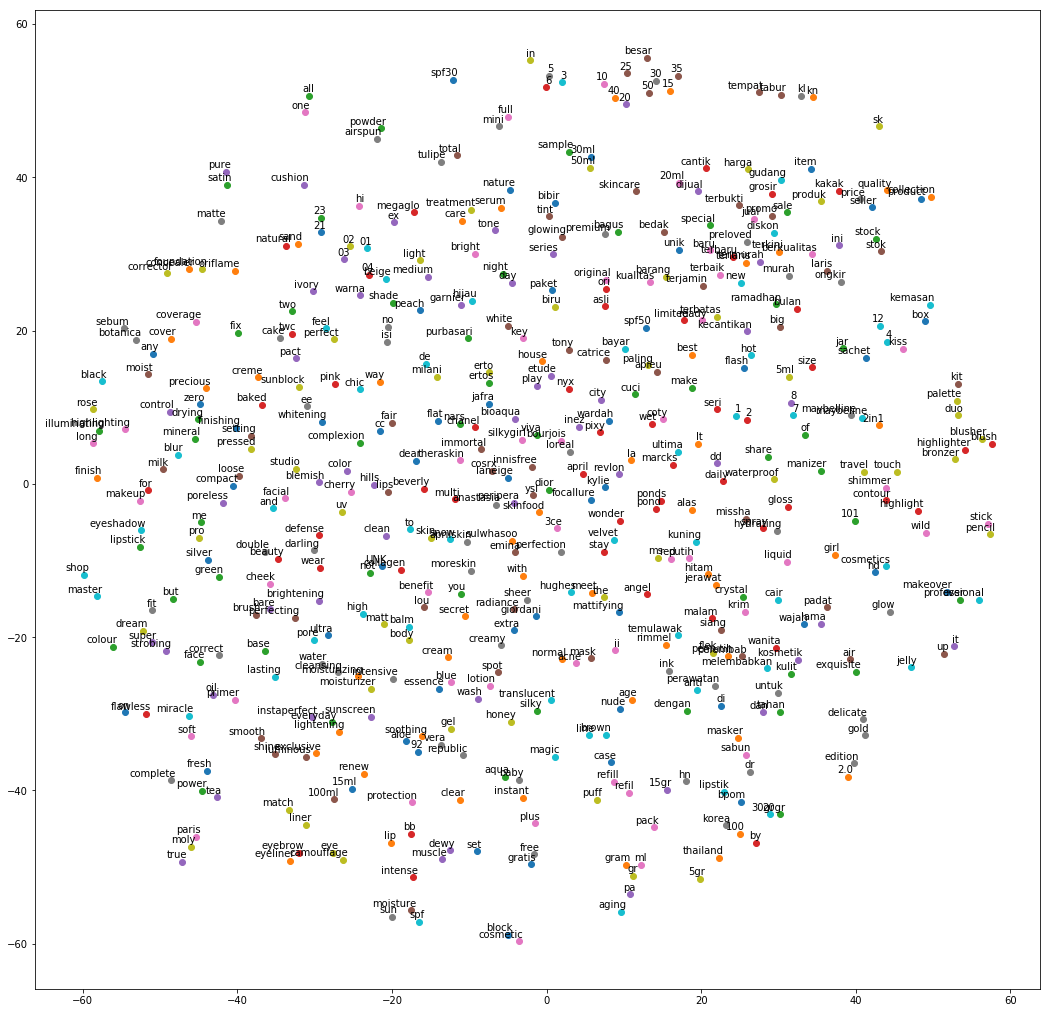

In [15]:
def plot_with_labels(low_dim_embs, labels):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
  return plt

plot_with_labels(low_dim_embs, labels).plot()

Let's try to calculate the feature vector for each title using the the TF-IDF weighted word vector of known words

In [16]:
def get_avg_title_vector(itemid, title):
  tokens = title.split()
  total_score = 0
  total_vec = np.zeros(embedding_size)
  for token in tokens:
    if token not in known_word_set:
      continue
    word_vec = final_embeddings[dictionary[token]]
    tf_idf_score = term_freq[(itemid, token)] * inverse_term_freq[token]
    total_score += tf_idf_score
    total_vec += word_vec * tf_idf_score
  
  if total_score == 0:
    return None
  return total_vec / total_score

input_data["title_vector"] = input_data.apply(lambda x: get_avg_title_vector(x.itemid, x.title), axis=1)

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(input_data.dropna(subset=['title_vector']), test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestClassifier

y_col = "Benefits"

clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(np.stack(train.title_vector.values), train[y_col])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
from sklearn.metrics import confusion_matrix

labels = input_data[y_col].unique()
labels.sort()

print(labels)
print(confusion_matrix(test[y_col].values, clf.predict(np.stack(test.title_vector.values)),
                 labels=labels))

[-1  0  1  2  3  4  5  6]
[[33246     0   579    19   492   170    21   185]
 [    1     0     0     0     0     0     0     0]
 [ 4297     0  3195     2    33    24     4    30]
 [  274     0     3   298     2     4     0     3]
 [ 3367     0    55     1  2158    10     2    27]
 [ 1220     0    27     1     8  1234     1     3]
 [  350     0    10     0     1     2   565     6]
 [ 1618     0    17     0    14     1     0  3718]]


In [20]:
clf.feature_importances_

array([0.01682391, 0.01446702, 0.01242469, 0.01307234, 0.01285422,
       0.01899815, 0.01503015, 0.01686826, 0.01334555, 0.01189451,
       0.01253589, 0.01484836, 0.01406473, 0.01691597, 0.01546699,
       0.01430696, 0.01866552, 0.02630575, 0.01289653, 0.01426053,
       0.02504478, 0.0124539 , 0.0168565 , 0.01241237, 0.01409539,
       0.01207623, 0.01287131, 0.02057824, 0.0110868 , 0.01811498,
       0.01402595, 0.01786436, 0.01297727, 0.01580476, 0.01605494,
       0.01143231, 0.01133874, 0.01090912, 0.01500988, 0.01200018,
       0.01418045, 0.02236592, 0.017812  , 0.01409474, 0.0178519 ,
       0.02716486, 0.01293991, 0.01339538, 0.0162619 , 0.01848438,
       0.01271923, 0.01152975, 0.01455216, 0.01340863, 0.02883298,
       0.01281228, 0.01811694, 0.01192144, 0.01124579, 0.0126822 ,
       0.02263673, 0.02047215, 0.01286903, 0.02259521])

In [ ]:
from PIL import Image

In [ ]:
im = Image.open(fp.image_base_folder+"mobile_image/70e0d8ddd69692b0f134498efbddf4e1.jpg")

In [ ]:
print(im.format, im.size, im.mode)